In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def parse_gro_file(gro_file_path):
    with open(gro_file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip header and last line (box vectors)
    atom_lines = lines[2:-1]

    # Initialize min and max coordinates
    min_coords = [float('inf'), float('inf'), float('inf')]
    max_coords = [-float('inf'), -float('inf'), -float('inf')]

    for line in atom_lines:
        # Extract coordinates
        x, y, z = float(line[20:28]), float(line[28:36]), float(line[36:44])

        # Update min and max coordinates
        min_coords = [min(min_coords[i], coord) for i, coord in enumerate([x, y, z])]
        max_coords = [max(max_coords[i], coord) for i, coord in enumerate([x, y, z])]

    min_coords=np.array(min_coords)*10
    max_coords=np.array(max_coords)*10
    return min_coords, max_coords

# Replace 'your_file.gro' with the path to your GRO file
min_coordinates, max_coordinates = parse_gro_file('../gromacs3/topology/processed.gro')

print("Minimum coordinates:", min_coordinates)
print("Maximum coordinates:", max_coordinates)
max_coordinates-min_coordinates

Minimum coordinates: [ 6.2  16.03 91.35]
Maximum coordinates: [ 17.03  26.58 180.97]


array([10.83, 10.55, 89.62])

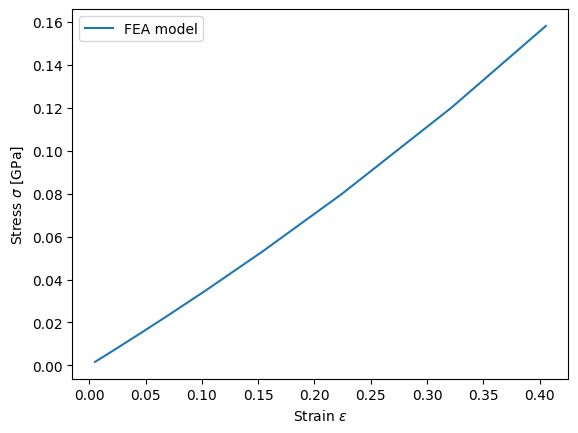

In [18]:
plot_abaqus=pd.read_csv('./abaqus/stress_strain_plot.csv')
plt.plot(plot_abaqus['0'],plot_abaqus['0.1'],label='FEA model')

# plot_gromacs=pd.read_csv('./gromacs/stress_strain.csv')
# plt.plot(plot_gromacs[],plot_gromacs[],label='MD model')

plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $\sigma$ [GPa]')
plt.legend()